In [ ]:
'''
Calling a function twice without the use of loops
Note that the complete script takes about a little over 2 seconds to complete
'''

import time

start = time.perf_counter()

def do_something():
  print("Sleeping 1 second...")
  time.sleep(1)
  print('Done sleeping...')

do_something()
do_something()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second...
Done sleeping...
Sleeping 1 second...
Done sleeping...
Finished in 2.002 second(s)


Without threadng:

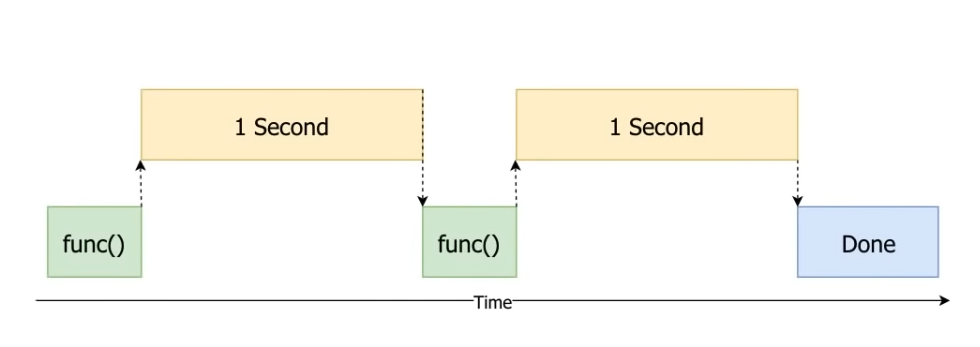

With threading:

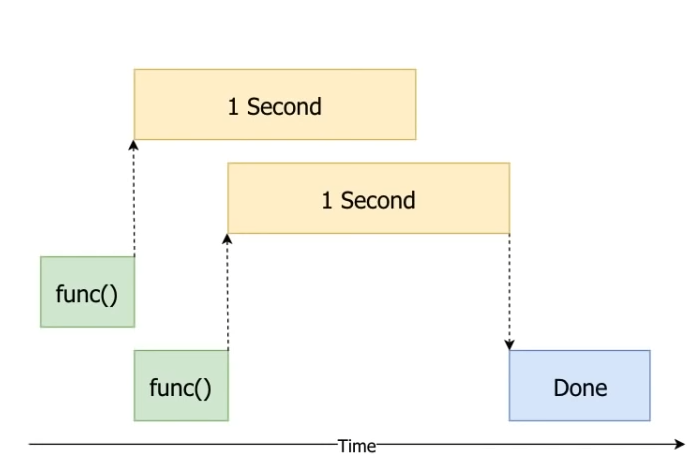

Threading gives the 'illusion' of functions starting at the same time or running simultaneously. What really happens is that using threading, after calling a function it just moves forward in the script and does whats next.

CPU bound tasks: Tasks that are crunching a lot of numbers and using the CPU

I/O bound tasks: Tasks waiting for input and output operations to be completed; not really using the CPU that much. e.g reading and writing from the file system, other file system operations, network operations, downloading stuff online

Threading: benefits for I/O bound tasks.




In [ ]:
'''
Calling a function twice using threads. No use of .join() so script doesnt wait for threads to finish and just continues executing whatevers next
Hence script is executed in no time
'''

import threading
import time

start = time.perf_counter()

def do_something():
  print("Sleeping 1 second...")
  time.sleep(1)
  print('Done sleeping...')

t1 = threading.Thread(target = do_something)
t2 = threading.Thread(target = do_something)

t1.start()
t2.start()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second...
Sleeping 1 second...
Finished in 0.005 second(s)


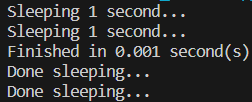

In [ ]:
'''
Calling a function twice using threads. Using .join() , the script waits for both the threads to finish executing and then moves on to executing whatevers next
Note that it takes a little over a second to finish the script
The difference in output with and without .join() is that using join, the script will start both threads one after another as usual but this time will wait
for the threads to finish and then continue executing rest of the script
'''

import threading
import time

start = time.perf_counter()

def do_something():
  print("Sleeping 1 second...")
  time.sleep(1)
  print('Done sleeping...')

t1 = threading.Thread(target = do_something)
t2 = threading.Thread(target = do_something)

t1.start()
t2.start()

t1.join()
t2.join()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second...
Sleeping 1 second...
Done sleeping...
Done sleeping...
Finished in 1.006 second(s)


In [ ]:
'''
Trying the same for running the function 10 times.
This time we will use a loop for creating and starting 10 threads
However we wont be able to use .join() in the loop since it would wait in each iteration of the loop for the thread to finish and then go on to the next
This would be the same as not using threads at all
So what we will do instead is append all these threads to a list and then iterate through this list to .join() all the functions
'''

import threading
import time

start = time.perf_counter()

def do_something():
  print("Sleeping 1 second...")
  time.sleep(1)
  print('Done sleeping...')

threads = []

for _ in range(10):
  t = threading.Thread(target = do_something)
  t.start()
  threads.append(t)

for thread in threads:
  thread.join()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...

Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...

Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...Done sleeping...

Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Finished in 1.017 second(s)


In [ ]:
'''
Trying the same for a function with arguments
'''

import threading
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  print('Done sleeping...')

threads = []

for _ in range(10):
  t = threading.Thread(target = do_something, args = [1.5])
  t.start()
  threads.append(t)

for thread in threads:
  thread.join()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...Sleeping 1.5 second(s)...

Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Done sleeping...
Done sleeping...
Done sleeping...Done sleeping...

Done sleeping...Done sleeping...

Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Finished in 1.515 second(s)


In [ ]:
'''
Spawning new threads on the fly is not a problem when the number of threads is less, but it becomes really cumbersome to manage threads if we are dealing with many threads.
Apart from this, it is computationally inefficient to create so many threads which will lead to a decline in throughput.
An approach to keep up the throughput is to create & instantiate a pool of idle threads beforehand and reuse the threads from this pool until all the threads are exhausted.
This way the overhead of creating new threads is reduced.
Also, the pool keeps track and manages the threads lifecycle and schedules them on the programmer’s behalf thus making the code much simpler and less buggy.

submit(fn, *args, **kwargs): It runs a callable or a method and returns a Future object representing the execution state of the method.
'''

In [ ]:
import concurrent.futures
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  return 'Done sleeping...'

with concurrent.futures.ThreadPoolExecutor() as executor:
  f1 = executor.submit(do_something, 1)
  print(f1.result())    #waits arounf till the function completes

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second(s)...
Done sleeping...
Finished in 1.004 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  return 'Done sleeping...'

with concurrent.futures.ThreadPoolExecutor() as executor:
  f1 = executor.submit(do_something, 1)
  f2 = executor.submit(do_something, 1)
  print(f1.result())
  print(f2.result())

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second(s)...Sleeping 1 second(s)...

Done sleeping...
Done sleeping...
Finished in 1.012 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  return 'Done sleeping...'

with concurrent.futures.ThreadPoolExecutor() as executor:
  results = [executor.submit(do_something, 1) for i in range(10)]
  for f in concurrent.futures.as_completed(results):          #as_completed(): gives an iterator that we can loop over that will yield the results of the threads as they r completed
    print(f.result())


finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done sleeping...
Sleeping 1 second(s)...
Done sleeping...
Sleeping 1 second(s)...
Done sleeping...
Sleeping 1 second(s)...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Finished in 2.007 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  return f'Done sleeping for {seconds}...'

with concurrent.futures.ThreadPoolExecutor() as executor:
  secs = [5,4,3,2,1]
  results = [executor.submit(do_something, sec) for sec in secs]
  for f in concurrent.futures.as_completed(results):          #as_completed(): gives an iterator that we can loop over that will yield the results of the threads as they r completed
    print(f.result())


finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Done sleeping for 1...
Done sleeping for 2...
Done sleeping for 3...
Done sleeping for 4...
Done sleeping for 5...
Finished in 5.01 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  return f'Done sleeping for {seconds}...'

with concurrent.futures.ThreadPoolExecutor() as executor:
  secs = [5,4,3,2,1]
  results = executor.map(do_something, secs)  #returns results in the order they were started
  for result in results:
    print(result)


finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Done sleeping for 5...
Done sleeping for 4...
Done sleeping for 3...
Done sleeping for 2...
Done sleeping for 1...
Finished in 5.015 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()

def do_something(seconds):
  print(f"Sleeping {seconds} second(s)...")
  time.sleep(seconds)
  return f'Done sleeping for {seconds}...'

with concurrent.futures.ThreadPoolExecutor() as executor:
  secs = [5,4,3,2,1]
  results = executor.map(do_something, secs)  #returns results in the order they were started



finish = time.perf_counter()

print(f'Finished in {round(finish - start, 3)} second(s)')

Sleeping 5 second(s)...Sleeping 4 second(s)...

Sleeping 3 second(s)...
Sleeping 2 second(s)...Sleeping 1 second(s)...

Finished in 5.009 second(s)


In [ ]:
'''
This is an I/O bound task.
Took around 11 secs to complete
Can be faster if downloads start simultaneously
'''

import requests
import time

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()

for img_url in img_urls:
  img_bytes = requests.get(img_url).content
  img_name = img_url.split('/')[3]
  img_name = f'{img_name}.jpg'
  with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Finished in 11.196212708999951 seconds


In [ ]:
'''
Doing the same with threadpoolexecutor
Finished in 3 seconds
'''

import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()

def download_image(img_url):
  img_bytes = requests.get(img_url).content
  img_name = img_url.split('/')[3]
  img_name = f'{img_name}.jpg'
  with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

with concurrent.futures.ThreadPoolExecutor() as executor:
  executor.map(download_image, img_urls)


t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Finished in 3.0094920889998775 seconds
